In [1]:
import scipy
from matplotlib.colors import LogNorm
import networkx
import sklearn
import sklearn.cluster

In [2]:
import json
import matplotlib.pyplot as plt
import sys

import numpy as np
import sklearn
import keras

import os
os.chdir("..")

sys.path += ["test"]
from train_clustering import load_element_pairs, fill_target_matrix, fill_elem_pairs

Using TensorFlow backend.


setGPU: Setting GPU to: 0


In [3]:
training_info = json.load(open("clustering.json"))

Text(0.5, 0, 'epoch')

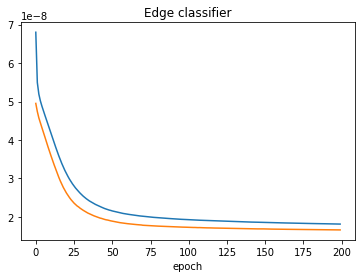

In [4]:
plt.title("Edge classifier")
plt.plot(training_info["loss"])
plt.plot(training_info["val_loss"])
plt.xlabel("epoch")

In [5]:
fn = "data/TTbar/191009_155100/step3_AOD_{0}_ev{1}.npz".format(1, 0)
data = np.load(fn)
els = data["elements"]
els_blid = data["element_block_id"]

fi = open(fn.replace("ev", "dist"), "rb")
dm = scipy.sparse.load_npz(fi).todense()

#Create the matrix of elements thar are connected according to the miniblock id
target_matrix = np.zeros((len(els_blid), len(els_blid)), dtype=np.int32)
fill_target_matrix(target_matrix, els_blid)

In [6]:
g = networkx.from_numpy_matrix(dm)

Text(0, 0.5, '$\\phi$')

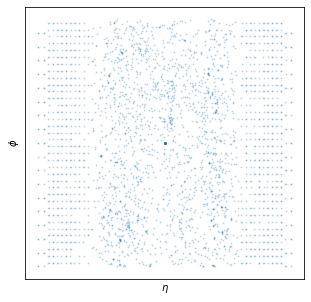

In [7]:
plt.figure(figsize=(5,5))
ax = plt.axes()
networkx.draw(
    g,
    pos=[(els[i, 2], els[i, 3]) for i in range(len(els))],
    node_size=1, axes=ax, alpha=0.2, edge_color="grey", edgelist=[])
plt.axis('on')
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Text(0, 0.5, '$\\phi$')

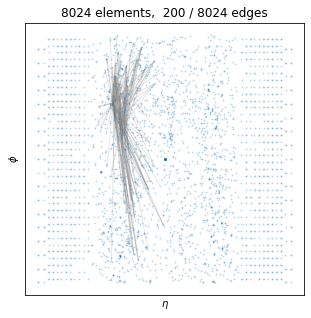

In [8]:
plt.figure(figsize=(5,5))
ax = plt.axes()
networkx.draw(
    g,
    pos=[(els[i, 2], els[i, 3]) for i in range(len(els))],
    node_size=1, axes=ax, alpha=0.2, edge_color="grey", edgelist=list(g.edges)[:200])
plt.axis('on')
plt.title("{0} elements,  200 / {1} edges".format(len(g.edges), len(g.edges)))
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")

In [9]:
all_elem_pairs_X = []
all_dms = []
all_blockids_true = [] 
all_elem_pairs_y = []

for i in range(500):
    for j in range(6,7):
        fn = "data/TTbar/191009_155100/step3_AOD_{1}_ev{0}.npz".format(i, j)
        all_blockids_true += [np.load(open(fn, "rb"))["element_block_id"]]
        
        print("Loading {0}".format(fn))
        elem_pairs_X, elem_pairs_y = load_element_pairs(fn)
        all_elem_pairs_X += [elem_pairs_X]
        all_elem_pairs_y += [elem_pairs_y]
        
        fi = open(fn.replace("ev", "dist"), "rb")
        dm = scipy.sparse.load_npz(fi).todense()
        all_dms += [dm]

Loading data/TTbar/191009_155100/step3_AOD_6_ev0.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev1.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev2.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev3.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev4.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev5.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev6.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev7.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev8.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev9.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev10.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev11.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev12.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev13.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev14.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev15.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev16.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev17.npz
Loading data/TTbar/191009_155100/step3

Loading data/TTbar/191009_155100/step3_AOD_6_ev153.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev154.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev155.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev156.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev157.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev158.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev159.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev160.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev161.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev162.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev163.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev164.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev165.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev166.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev167.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev168.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev169.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev170.npz
Loading da

Loading data/TTbar/191009_155100/step3_AOD_6_ev302.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev303.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev304.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev305.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev306.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev307.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev308.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev309.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev310.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev311.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev312.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev313.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev314.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev315.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev316.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev317.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev318.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev319.npz
Loading da

Loading data/TTbar/191009_155100/step3_AOD_6_ev452.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev453.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev454.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev455.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev456.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev457.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev458.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev459.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev460.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev461.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev462.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev463.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev464.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev465.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev466.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev467.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev468.npz
Loading data/TTbar/191009_155100/step3_AOD_6_ev469.npz
Loading da

In [10]:
elem_pairs_X = np.vstack(all_elem_pairs_X)
elem_pairs_y = np.vstack(all_elem_pairs_y)

In [11]:
from collections import Counter

In [12]:
model = keras.models.load_model("clustering.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
pp = model.predict(elem_pairs_X, batch_size=10000)

In [14]:
from sklearn.linear_model import LogisticRegression
t0 = 5
t1 = 1
sel = (elem_pairs_X[:, 0]==t0) & (elem_pairs_X[:, 1]==t1)

dumdum = LogisticRegression(solver="lbfgs")
dumdum.fit(elem_pairs_X[sel], elem_pairs_y[sel, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
r = sklearn.metrics.roc_curve(elem_pairs_y[sel, 0], pp[sel])
r2 = sklearn.metrics.roc_curve(elem_pairs_y[sel, 0], 1.0 - elem_pairs_X[sel, 2])

In [16]:
threshold = 0.5
idx = len(r2) - np.searchsorted(r[2][::-1], threshold)

Text(0.5, 1.0, 'Element 5<->1 linking')

/usr/local/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


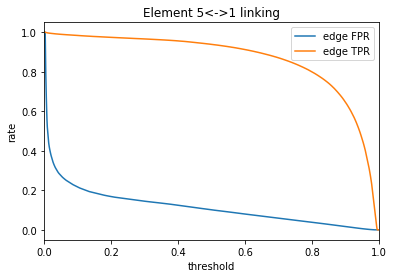

In [17]:
plt.plot(r[2], r[0], label="edge FPR")
plt.plot(r[2], r[1], label="edge TPR")
plt.xlim(0,1)
plt.legend()
plt.ylabel("rate")
plt.xlabel("threshold")
plt.title("Element {0}<->{1} linking".format(t0, t1))

(0, 1)

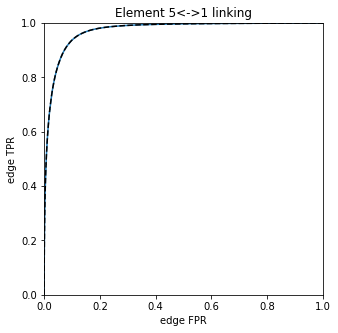

In [18]:
plt.figure(figsize=(5,5))
plt.plot(r[0], r[1], label="simple feedforward DNN")
plt.plot(r2[0], r2[1], color="black", ls="--", label="logistic regression")
plt.title("Element {0}<->{1} linking".format(t0, t1))
plt.xlabel("edge FPR")
plt.ylabel("edge TPR")
plt.xlim(0,1)
plt.ylim(0,1)

In [19]:
pp

array([[0.8204961 ],
       [0.31630483],
       [0.42550406],
       ...,
       [0.9998346 ],
       [0.18078193],
       [0.18078193]], dtype=float32)

In [20]:
elem_pairs_X[0]

array([5.        , 1.        , 0.21347117], dtype=float32)

In [36]:
import numba
@numba.njit
def pred_to_adj_matrix(nelems, pred, dm, adj_matrix):
    n = 0
    for i in range(nelems):
        for j in range(i+1, nelems):
            assert(n <= len(pred))
            if dm[i,j] > 0:
                adj_matrix[i,j] = pred[n, 0]
            n += 1

In [48]:
def predict_clustering(fn):
    fi = open(fn, "rb")
    data = np.load(fi)
    els = data["elements"]
    els_blid = data["element_block_id"]
    nelem = len(els)

    #Load the distance matrix
    fi = open(fn.replace("ev", "dist"), "rb")
    dm = scipy.sparse.load_npz(fi).todense()
  
    print(els.shape, dm.shape)
    return els, dm
#     elem_pairs_X, elem_pairs_y = load_element_pairs(fn)
#     pp = model.predict(elem_pairs_X)
    
#     adj_matrix = np.zeros((nelem, nelem), dtype=np.float32)
#     pred_to_adj_matrix(nelem, pp, dm, adj_matrix)
#     return adj_matrix

In [116]:
fn

'data/TTbar/191009_155100/step3_AOD_6_ev499.npz'

In [117]:
els, dm = predict_clustering('data/TTbar/191009_155100/step3_AOD_7_ev0.npz')

(2988, 8) (2988, 2988)


In [118]:
@numba.njit
def set_triu(i1, i2, vec, mat):
    for i in range(len(i1)):
        mat[i1[i], i2[i]] = vec[i]

In [119]:
i1, i2 = np.triu_indices(len(els))
dmv = np.array(dm[i1, i2])[0, :]
vec = np.vstack([els[i1, 0], els[i2, 0], dmv]).T
p2 = model.predict_proba(vec, batch_size=100000)
p2[dmv==0]=0

mat = np.zeros((len(els), len(els)))
set_triu(i1, i2, p2[:, 0], mat)

In [120]:
g1 = networkx.from_numpy_matrix(dm)
g2 = networkx.from_numpy_matrix(mat>0.5)

In [121]:
len(list(networkx.connected_component_subgraphs(g1)))

1373

In [122]:
len(list(networkx.connected_component_subgraphs(g2)))

1678

In [ ]:
sklearn.metrics